In [2]:
import stratMACDBoll
# import statements + autoreload #

%load_ext autoreload
%autoreload 2

import infrastructure as inf
import stratMACD
import executeStrats as strats

# MACD Backtest Data #
tl;dr-- ETC found to have most robust returns over all tradeable coins, and Sharpe Ratios of different MACD configurations found vastly superior to buy-and-hold strategy, with higher mean returns and lower volatility.

Interesting to note that coins with larger market caps (BTC, ETH, ADA, etc.) generally perform poorly with MACD. This could be due to the lower proportion of retail:institutional investments in these coins, though this would have to be investigated further.

### Ranked Coins (Over Past Year)
##### note: will take a while to run

In [3]:
# (4, 18, 3) #
print(stratMACD.rankCoins(1440, 4, 18, 3, index=365, trade_fee=.001))

               final
ETCUSD    192.157357
MATICUSD  174.235306
KNCUSD    137.708873
QNTUSD    135.987445
BALUSD    120.963211
...              ...
BNCUSD     31.816115
ENJUSD     31.046327
TBTCUSD    21.045469
PAXGUSD    -0.080298
ANTUSD     -0.161508

[88 rows x 1 columns]


In [4]:
# (12, 26, 9) #
print(stratMACD.rankCoins(1440, 12, 26, 9, index=365, trade_fee=.001))

               final
ETCUSD    247.782262
SHIBUSD   151.251368
CHZUSD    143.055627
PERPUSD   129.663978
YFIUSD    124.784888
...              ...
OCEANUSD   49.865907
OMGUSD     48.878402
TBTCUSD    44.337820
RAYUSD     44.105322
PAXGUSD    -0.100918

[88 rows x 1 columns]


In [5]:
# (20, 40, 14) #
print(stratMACD.rankCoins(1440, 20, 40, 14, index=365, trade_fee=.001))

              final
DOGEUSD  211.749544
ETCUSD   146.054866
BALUSD   132.268363
BANDUSD  128.101247
ADAUSD   118.065180
...             ...
SNXUSD    40.058996
KSMUSD    39.616593
RARIUSD   35.150667
CRVUSD    24.091732
PAXGUSD   -0.099866

[88 rows x 1 columns]


### MACD Visualisations
##### (past year)

ETCUSD close (top) and MACD value (bottom)

C:\Users\jonat\PycharmProjects\tradingStrategies\stratMACD.py:227: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


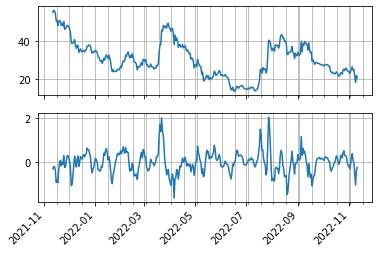

In [6]:
# (4, 18, 3) #
data1 = stratMACD.getMACDData('ETCUSD', 1440, 4, 18, 3).iloc[-365:]
stratMACD.plotMACD(data1)

C:\Users\jonat\PycharmProjects\tradingStrategies\stratMACD.py:227: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


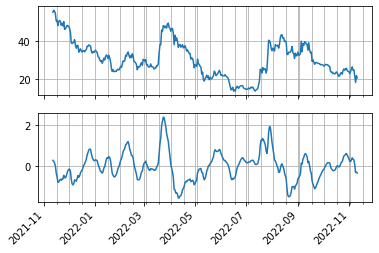

In [7]:
# (12, 26, 9) #
data2 = stratMACD.getMACDData('ETCUSD', 1440, 12, 26, 9).iloc[-365:]
stratMACD.plotMACD(data2)

### Sharpe Ratios of MACD ETCUSD Strategies + Histogram of Returns over past Year
##### (aggregated monthly, then annualized)

           Mean      Vol    Sharpe
Strat  1.027088  1.19006  0.863056


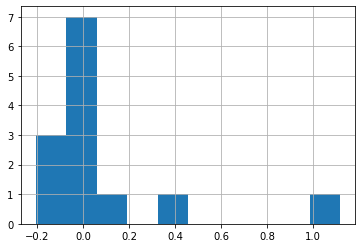

<Figure size 36x36 with 0 Axes>

In [8]:
# (4, 18, 3) #
results1 = stratMACD.backtestLongMACD(data1, trade_fee=.001)
print(inf.getSharpe(results1, '1M'))
inf.plotHistogram(results1, '1M')

# view monthly returns with code below
# print((results1['% change']+1).resample('1M').prod()-1)

           Mean      Vol    Sharpe
Strat  1.038158  0.74406  1.395261


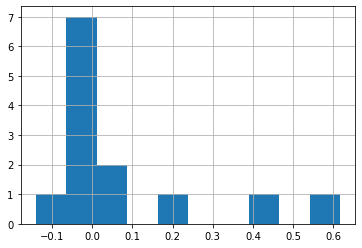

<Figure size 36x36 with 0 Axes>

In [9]:
# (12, 26, 9) #
results2 = stratMACD.backtestLongMACD(data2, trade_fee=.001)
print(inf.getSharpe(results2, '1M'))
inf.plotHistogram(results2, '1M')

# view monthly returns with code below
# print((results2['% change']+1).resample('1M').prod()-1)

           Mean       Vol    Sharpe
Strat -0.033991  1.686483 -0.020155


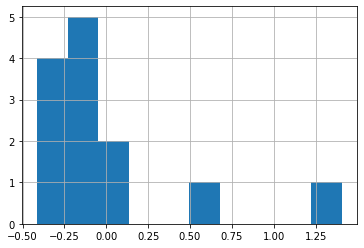

<Figure size 36x36 with 0 Axes>

In [10]:
# control: buy and hold #
control = inf.getHoldReturns('ETCUSD', 1440).iloc[-365:]
print(inf.getSharpe(control, '1M'))
inf.plotHistogram(control, '1M')

# view monthly returns with code below
# print((control['% change']+1).resample('1M').prod()-1)

Important to note that ETC returns display extreme tail behavior, so Sharpe Ratio perhaps not the best way of comparing returns, and particularly does not capture risk